In [1]:
import numpy as np
import matplotlib.pyplot as plt

## 1-D diffusion equation

### 1. create a fault scarp

In [12]:
def create_fault_scarp(land_length, land_slope, breakpoint, scarp_height, scarp_slope, dx):
    """
    A land is created with length and slope. A fault scarp is created at a breakpoint with a scarp height and slope.

    Parameters:
    land_length (float): The length of the land.
    land_slope (float): The slope of the land.
    breakpoint (float): The location of the fault scarp at the hanging wall.
    scarp_height (float): The height of the fault scarp.
    scarp_slope (float): The slope of the fault scarp.
    dx (float): The distance between sampling points.
    """
    # Calculate the breakpoints
    x_breakpoint_0 = breakpoint
    x_breakpoint_1 = breakpoint + scarp_height / scarp_slope

    # assert that the scarp is not too high
    assert x_breakpoint_1 < land_length, "The scarp is too high for the land length."

    # Create the land segmentations
    X_0 = np.arange(0, x_breakpoint_0, dx)
    X_1 = np.arange(x_breakpoint_0, x_breakpoint_1, dx)
    X_2 = np.arange(x_breakpoint_1, land_length, dx)

    # Create the land
    Y_0 = X_0*land_slope
    Y_1 = scarp_slope*(X_1 - x_breakpoint_0) + land_slope*x_breakpoint_0
    Y_2 = land_slope*(X_2 - x_breakpoint_1) + land_slope*x_breakpoint_0 + scarp_height

    # Concatenate the land
    X = np.concatenate([X_0, X_1, X_2])
    Y = np.concatenate([Y_0, Y_1, Y_2])

    return X, Y

def plot_fault_scarp(X, Y):
    """
    Plot the fault scarp.

    Parameters:
    X (np.array): The x-coordinates of the fault scarp.
    Y (np.array): The y-coordinates of the fault scarp.
    """
    plt.plot(X, Y)
    plt.xlabel("Distance")
    plt.ylabel("Height")
    plt.title("Fault scarp")
    plt.show()

### 2. Apply diffusion equation

In [20]:
def model_fault_scarp_process(X, Y, D, T, dt=0.01):
    # Number of spatial points
    Nx = len(X)

    # Calculate the spatial and time steps
    dx = X[1] - X[0]
    
    # assess stability
    assert D*dt/dx**2 < 0.5, "The model is unstable."

    # Number of time points
    Nt = int(T / dt)

    # Initialize solution matrix over time
    u_matrix = np.zeros((Nt, Nx))
    u_matrix[0, :] = Y

    # Simulation
    for n in range(1, Nt):
        u_next = u_matrix[n-1].copy()
        for i in range(1, Nx-1):
            u_next[i] = u_matrix[n-1][i] + D * dt / dx**2 * (u_matrix[n-1][i+1] - 2*u_matrix[n-1][i] + u_matrix[n-1][i-1])
        u_matrix[n] = u_next

    return u_matrix

In [25]:
land_length = 20.0  # Length of the land
land_slope = 0.05   # Initial slope of the land
breakpoint = 10.0   # Position of the fault scarp
scarp_height = 1.0 # Height of the fault scarp
scarp_slope = 0.5  # Slope of the scarp
dx = 0.1           # Spatial resolution
D = 0.0001           # Diffusion coefficient
dt = 0.1         # Time step size


X, Y = create_fault_scarp(land_length, land_slope, breakpoint, scarp_height, scarp_slope, dx)

T = 10000.0
u_matrix = model_fault_scarp_process(X, Y, D, T, dt)


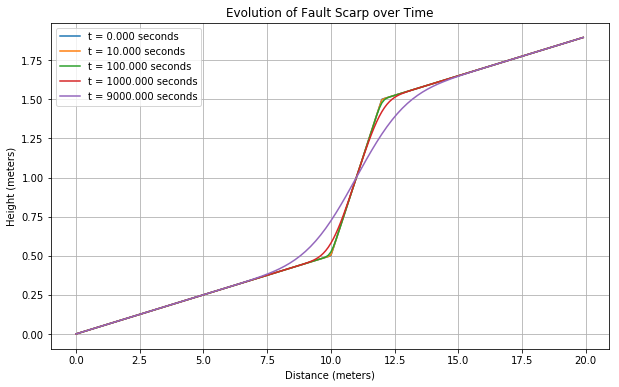

In [26]:
# Plotting several time steps to see the evolution
time_steps = [0, 100, 1000, 10000, 90000]
plt.figure(figsize=(10, 6))
for t in time_steps:
    plt.plot(X, u_matrix[t], label=f't = {t*dt:.3f} seconds')

plt.title('Evolution of Fault Scarp over Time')
plt.xlabel('Distance (meters)')
plt.ylabel('Height (meters)')
plt.legend()
plt.grid(True)
plt.show()